### [A Gentle Introduction to PyTorch](https://www.dataquest.io/blog/pytorch-for-beginners/)
Please note: The majority of this code was copied from the link above. 
It is purely for practice.

In [3]:
# import necessary packages
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
# setting up training and testing data
training_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

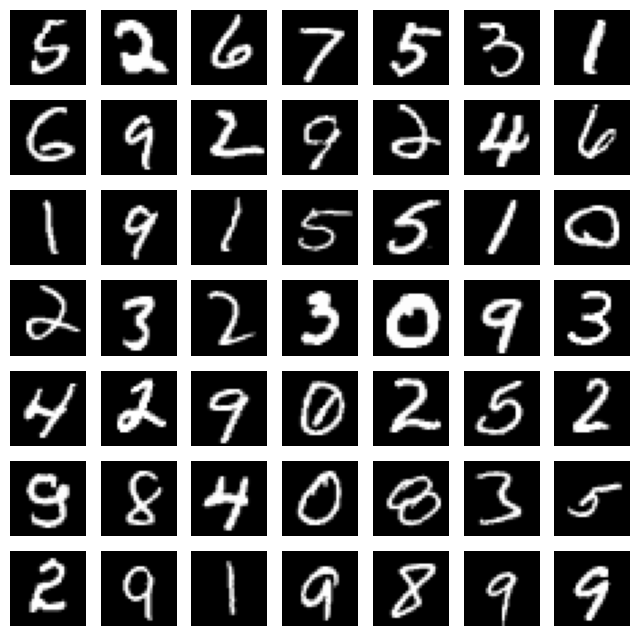

In [5]:
# visualize this random data as images
figure = plt.figure(figsize=(8, 8))
cols, rows = 7, 7

# just iterates over the size and creates a
# random image of 49 handwritten numbers
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
# more unseen datasets for testing
from torch.utils.data import DataLoader

loaded_train = DataLoader(training_data, batch_size=64, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=64, shuffle=True)

In [7]:
# initialize the neural network using pytorch
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
# initialize the model
model = NeuralNetwork()

# loss function initialization
loss_function = nn.CrossEntropyLoss()

# inialize gradient descent (lr is learning rate)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) # change this learning rate! play around. 
                                                        # the faster the learning rate, the more accurate initially, but not always!

In [9]:
# train the neural network
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [10]:
# test the neural network
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # this turns off the gradient descent
    # meaning its no longer trying to 'learn'
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [11]:
# training the model, an epoch is an iteration over
# the data set

# 25 epochs will run for about: 3 minutes, 15 seconds
# 90% accuracy
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaded_train, model, loss_function, optimizer)
    test(loaded_test, model, loss_function)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309700  [    0/60000]


KeyboardInterrupt: 

In [ ]:
# save the model
torch.save(model, "basic-classification.pth")
model = torch.load("basic-classification.pth")

The following code is inspired by this StackOverflow [post](https://stackoverflow.com/questions/65932328/pytorch-while-loading-batched-data-using-dataloader-how-to-transfer-the-data-t).

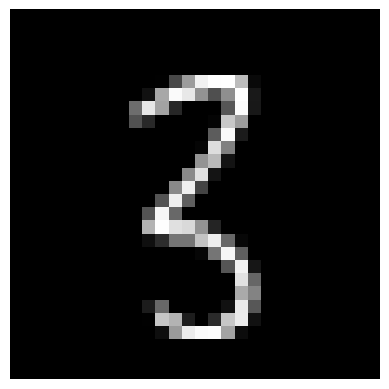

Guess: 3 	Actual: 3


In [ ]:
# test the model on a single case
from torch import IntTensor

# this function tests a single image
def test_single(img, model):
    model.eval()

    with torch.no_grad():
        output = model( img )

        # get prediction
        output = torch.argmax(output, 1)

    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

    return output

# the following code fetches a single image to be test
# it prints its actual appearance
# and the guess
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
output = test_single(img, model)
print("Guess:", IntTensor.item(output[0]), "\tActual:", label)